<a href="https://colab.research.google.com/github/dafegh/Concrete-Classifier-using-CNN/blob/main/ConcreteTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
img_dir = ('/content/drive/MyDrive/concreteamalu/concreteamalu')

In [ ]:
import pathlib

img_dir = pathlib.Path("/content/drive/MyDrive/concreteamalu/concreteamalu")

count = len(list(img_dir.rglob("*/*.jpg")))

In [ ]:
print(count)

40000


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import PIL
import h5py

In [ ]:
img_args = dict(rescale=1./255, validation_split=.20)

In [ ]:
#Training set
Con_train = tf.keras.preprocessing.image.ImageDataGenerator(**img_args)

train_gen = Con_train.flow_from_directory(
img_dir,
subset="training",
shuffle=True,
target_size=(224, 224))

#Test set
Con_test = tf.keras.preprocessing.image.ImageDataGenerator(**img_args)

test_gen = Con_test.flow_from_directory(
img_dir,
subset="validation",
shuffle=True,
target_size=(224, 224))

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [ ]:
#Getting label shape
for image_batch, label_batch in train_gen:
  break
  image_batch.shape, label_batch.shape

In [ ]:
#Print training class labels
print (train_gen.class_indices)

{'Crack': 0, 'Negative': 1}


In [ ]:
#Importing tensorflow hub for pretrained model
import tensorflow_hub as hub

In [ ]:
#Pretrained model parameters
model_base = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])
model_base.build([None, 224, 224, 3]) #Model build

In [ ]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Model compilation
optimizer = tf.keras.optimizers.Adam(lr=0.001)

model_base.compile(
 optimizer=optimizer,
 loss= 'categorical_crossentropy',
 metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
epochs=10
history = model_base.fit(
  train_gen,
  validation_data=test_gen,
  epochs=epochs,batch_size=128,
  callbacks =[earlystopping]
)

Epoch 1/10
1000/1000 [==============================] - 8606s 9s/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0068 - val_accuracy: 0.9974
Epoch 2/10
1000/1000 [==============================] - 1122s 1s/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0046 - val_accuracy: 0.9975
Epoch 3/10
1000/1000 [==============================] - 1151s 1s/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 4/10
1000/1000 [==============================] - 1140s 1s/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 5/10
1000/1000 [==============================] - 1154s 1s/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0054 - val_accuracy: 0.9983
Epoch 6/10
1000/1000 [==============================] - 1182s 1s/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0037 - val_accuracy: 0.9986
Epoch 7/10
1000/1000 [==============================] - 1196s 1s/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0058 -

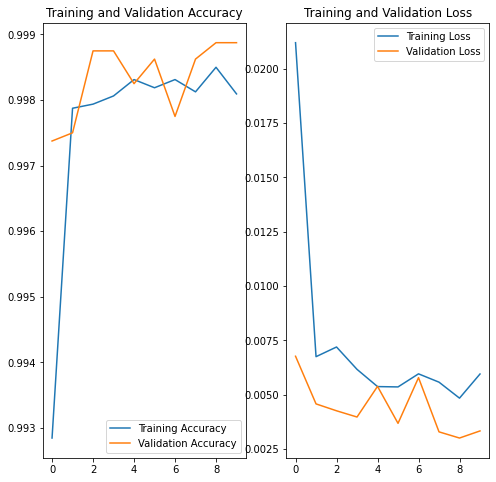

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
acc = model_base.evaluate(test_gen)
print('Accuracy: %.2f'%(acc[1]*100))

250/250 [==============================] - 251s 1s/step - loss: 0.0033 - accuracy: 0.9989
Accuracy: 99.89


In [ ]:
concretetrans_dir = '/content/drive/MyDrive/ConcreteTRANS/modeltrans_dir.h5'
model_base.save(concretetrans_dir)